# Requests로 베스트셀러 데이터 수집하기

## 미리보기

In [16]:
from IPython.display import Image
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests

def get_bestseller_top20():
    
    url = "http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf"
    response = requests.post(url, headers={"user-agent": "Mozilla/5.0"})
    html = bs(response.text)
    
    title_tags = html.select(".title > a > strong")
    price_tags = html.select(".detail > .price > strong")
    
    best_dict = {}

    for i in range(len(title_tags)):
        best_dict[i+1] = [title_tags[i].contents[0], price_tags[i].contents[0]]
        
    df = pd.DataFrame(best_dict).transpose()
    df.columns = ['도서', '가격']
    
    return df[:20]

In [17]:
get_bestseller_top20()

,도서,가격
1,하얼빈(양장본 Hardcover),"14,400원"
2,역행자,"15,750원"
3,불편한 편의점 2,"12,600원"
4,불편한 편의점(40만부 기념 벚꽃 에디션),"12,600원"
5,파친코 2,"14,220원"
6,원씽(The One Thing)(리커버 특별판),"12,600원"
7,아버지의 해방일지,"13,500원"
8,잘될 수밖에 없는 너에게,"14,400원"
9,심리학이 분노에 답하다,"16,020원"
10,나는 나를 바꾸기로 했다,"14,220원"


## 1. 라이브러리 로드

In [1]:
from IPython.display import Image
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests

## 2. 베스트셀러 페이지 url 가져오기

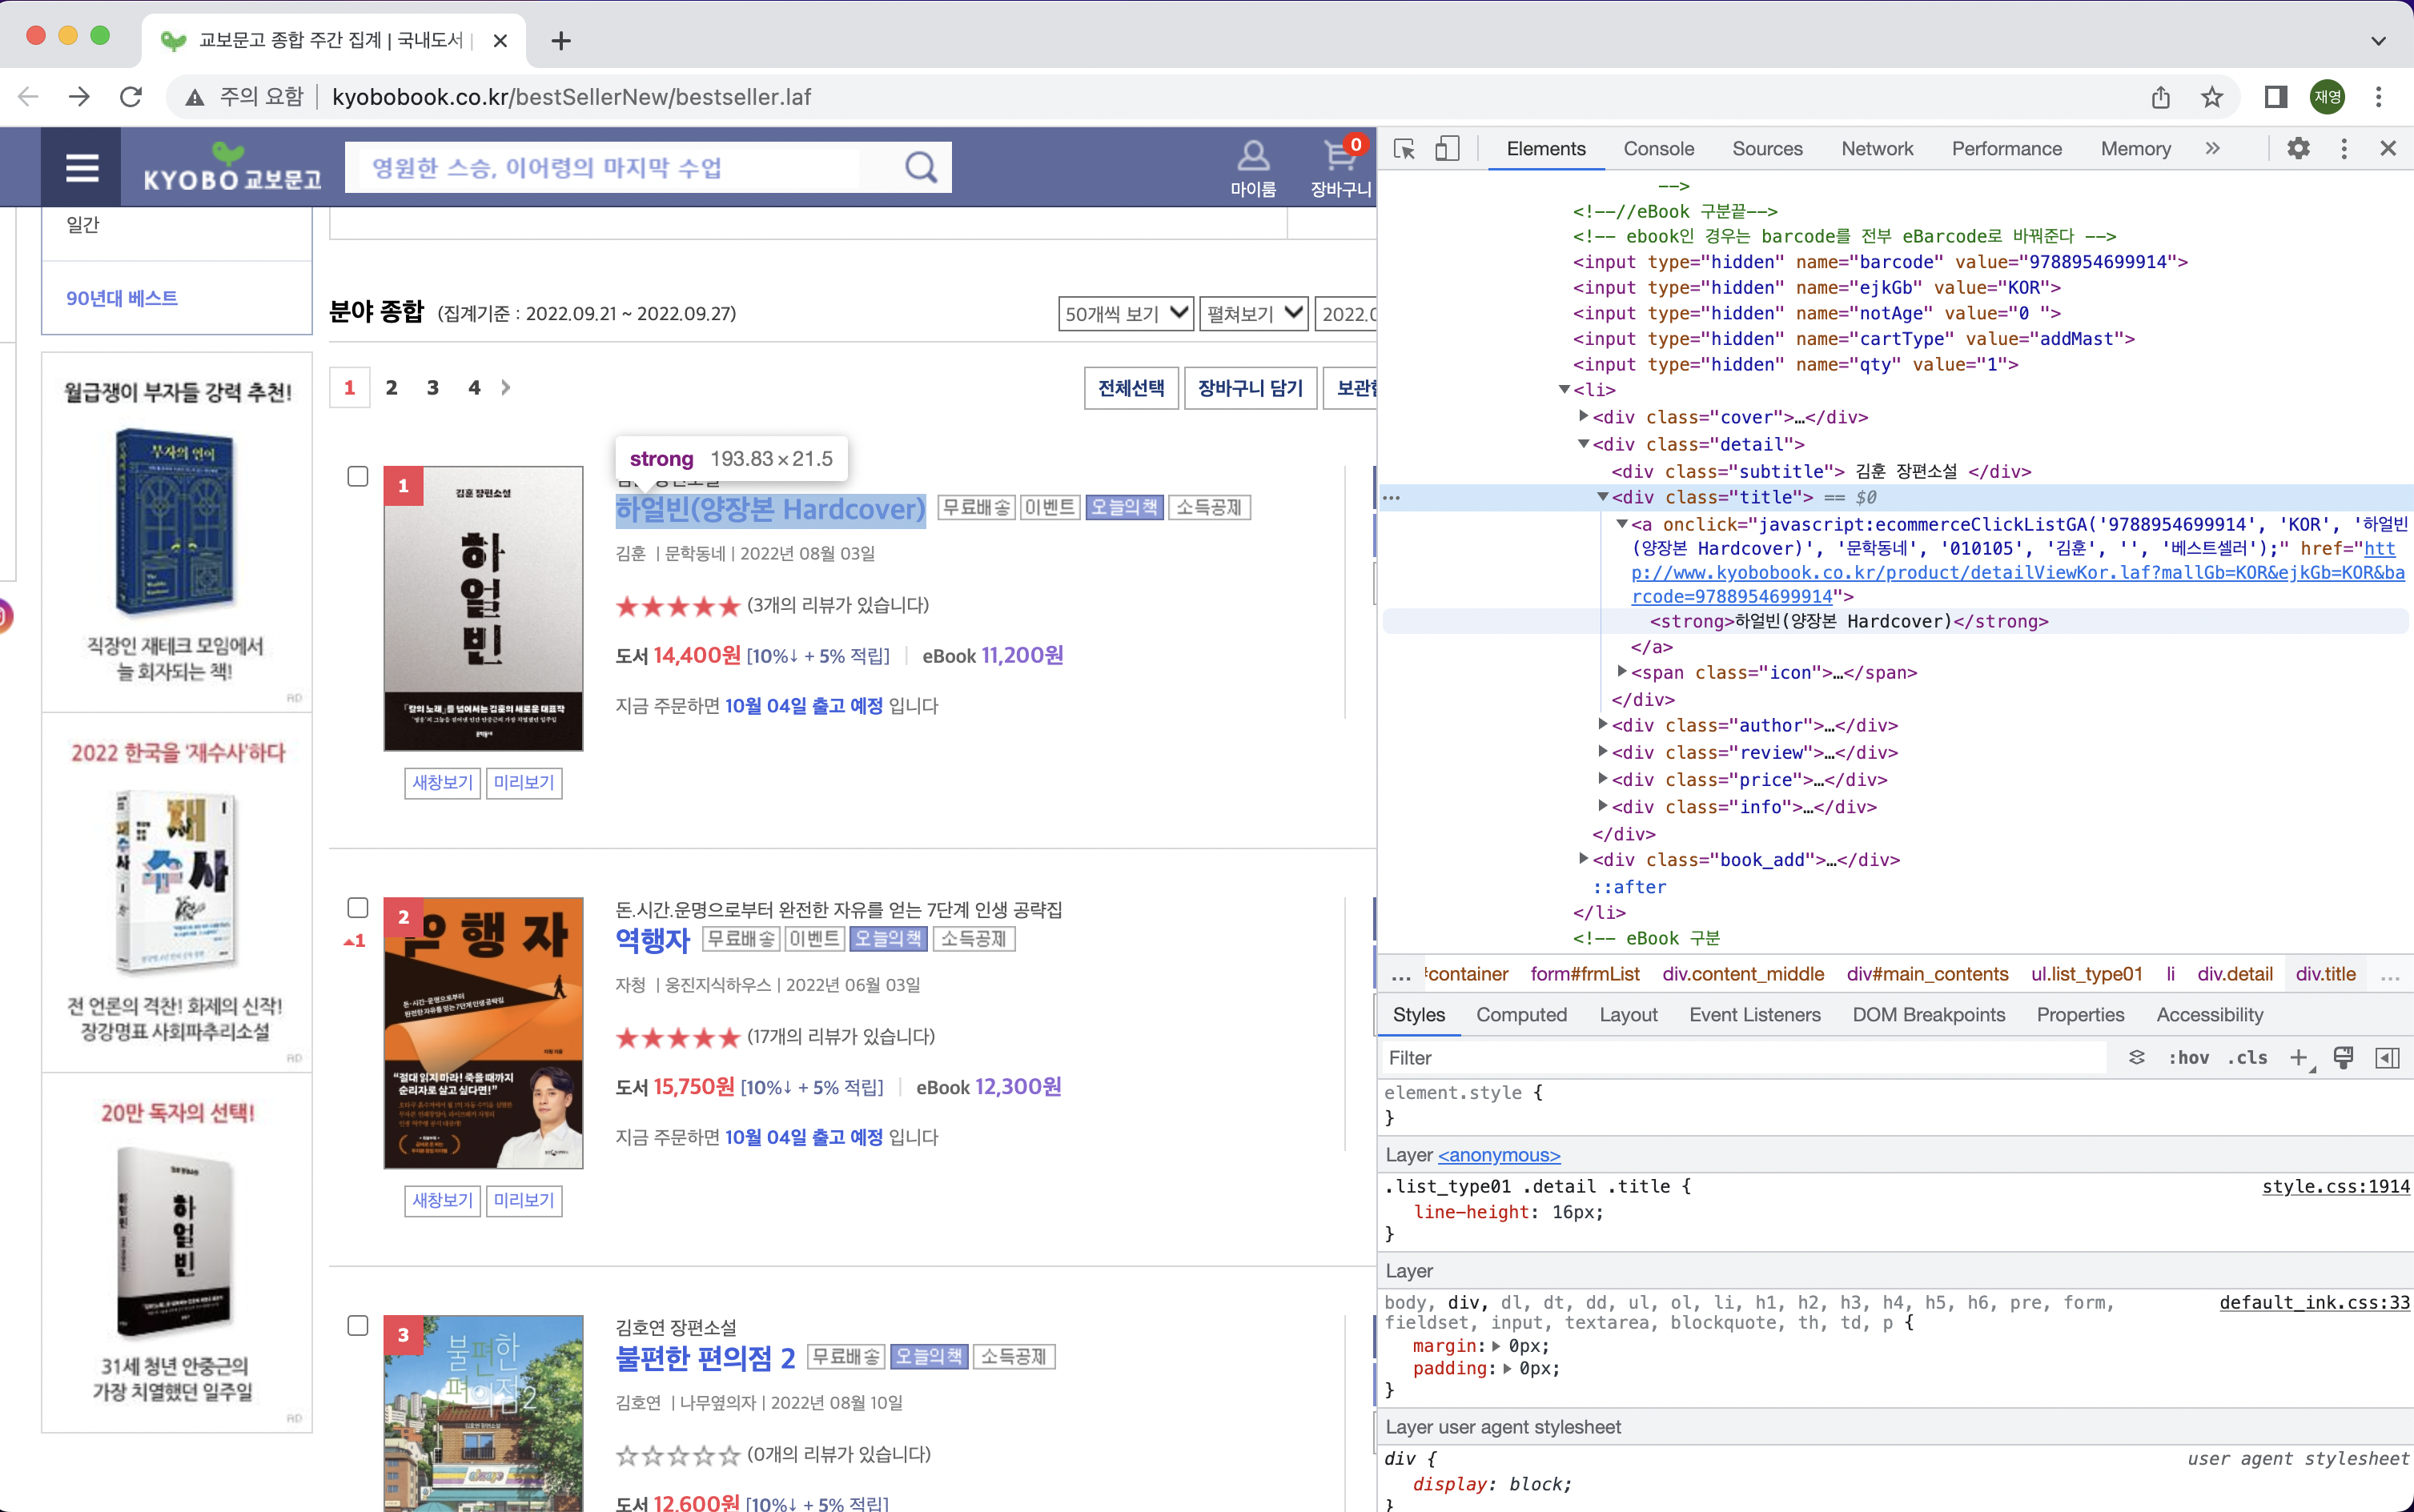

In [2]:
Image("images/kyobobook_bestseller.png")

## 3. Requests를 통한 HTTP 요청

In [3]:
url = "http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf"

In [4]:
response = requests.post(url, headers={"user-agent": "Mozilla/5.0"})
response

<Response [200]>

## 4. BeautifulSoup으로 태그 찾기

In [5]:
html = bs(response.text)

In [6]:
title_tags = html.select(".title > a > strong")

In [7]:
title_tags[:5]

[<strong>하얼빈(양장본 Hardcover)</strong>,
 <strong>역행자</strong>,
 <strong>불편한 편의점 2</strong>,
 <strong>불편한 편의점(40만부 기념 벚꽃 에디션)</strong>,
 <strong>파친코 2</strong>]

In [9]:
price_tags = html.select(".detail > .price > strong")

In [10]:
price_tags[:5]

[<strong class="book_price">14,400원</strong>,
 <strong class="book_price">15,750원</strong>,
 <strong class="book_price">12,600원</strong>,
 <strong class="book_price">12,600원</strong>,
 <strong class="book_price">14,220원</strong>]

## 5. 불필요한 태그 제거하기

In [11]:
title_tags[0].contents[0]

'하얼빈(양장본 Hardcover)'

In [12]:
price_tags[0].contents

['14,400원']

In [13]:
best_dict = {}

for i in range(len(title_tags)):
    best_dict[i+1] = [title_tags[i].contents[0], price_tags[i].contents[0]] 

In [15]:
# key : 순위, values : 책제목, 가격
best_dict

{1: ['하얼빈(양장본 Hardcover)', '14,400원'],
 2: ['역행자', '15,750원'],
 3: ['불편한 편의점 2', '12,600원'],
 4: ['불편한 편의점(40만부 기념 벚꽃 에디션)', '12,600원'],
 5: ['파친코 2', '14,220원'],
 6: ['원씽(The One Thing)(리커버 특별판)', '12,600원'],
 7: ['아버지의 해방일지', '13,500원'],
 8: ['잘될 수밖에 없는 너에게', '14,400원'],
 9: ['심리학이 분노에 답하다', '16,020원'],
 10: ['나는 나를 바꾸기로 했다', '14,220원'],
 11: ['세상의 마지막 기차역', '12,600원'],
 12: ['흔한남매 11', '13,050원'],
 13: ['세상에서 가장 쉬운 본질육아', '16,920원'],
 14: ['기분을 관리하면 인생이 관리된다', '15,840원'],
 15: ['부자 아빠 가난한 아빠 1(20주년 특별 기념판)(개정증보판)', '14,220원'],
 16: ['그대만 모르는 비밀 하나', '15,120원'],
 17: ['그릿(100쇄 기념 리커버 에디션)', '14,400원'],
 18: ['최소한의 이웃', '14,220원'],
 19: ['믹스(Mix)', '16,920원'],
 20: ['설민석의 한국사 대모험 22', '11,700원'],
 21: ['계속 가보겠습니다', '16,200원'],
 22: ['데일 카네기 인간관계론', '10,350원'],
 23: ['마흔에 읽는 니체', '14,400원'],
 24: ['그리고 행복하다는 소식을 들었습니다(양장본 Hardcover)', '14,220원'],
 25: ['오싹오싹 크레용!(토토의 그림책)(양장본 Hardcover)', '11,700원'],
 26: ['언어를 디자인하라', '15,300원'],
 27: ['작별인사(밤하늘 에디션)', '12,600원'],
 28: ['엄마의 말 연습', '1

## 6. DataFrame으로 반환

In [14]:
df = pd.DataFrame(best_dict)
df

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,하얼빈(양장본 Hardcover),역행자,불편한 편의점 2,불편한 편의점(40만부 기념 벚꽃 에디션),파친코 2,원씽(The One Thing)(리커버 특별판),아버지의 해방일지,잘될 수밖에 없는 너에게,심리학이 분노에 답하다,나는 나를 바꾸기로 했다,...,해커스 토익 기출 보카 TOEIC VOCA(개정판 5판),"어서 오세요, 휴남동 서점입니다 (여름 숲 에디션)",클루지(CREATIVE CLASSIC SERIES),흔한남매 수수께끼 어드벤처 1,포켓몬스터 썬&문 포켓몬 전국대도감,사람을 얻는 지혜,데일 카네기 자기관리론(1948년 초판 완역본),데미안(세계문학전집 44),아몬드(100만 부 기념 특별판)(양장본 Hardcover),멘탈을 바꿔야 인생이 바뀐다
1,"14,400원","15,750원","12,600원","12,600원","14,220원","12,600원","13,500원","14,400원","16,020원","14,220원",...,"11,610원","13,500원","12,420원","12,600원","8,550원","12,420원","10,350원","7,200원","10,800원","14,220원"


In [15]:
# 행 열 전환, top20 범위 제한
df = df.transpose()

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.columns

RangeIndex(start=0, stop=2, step=1)

In [18]:
df.columns = ['도서', '가격']

In [19]:
top_20 = df[:20]

In [20]:
top_20

,도서,가격
1,하얼빈(양장본 Hardcover),"14,400원"
2,역행자,"15,750원"
3,불편한 편의점 2,"12,600원"
4,불편한 편의점(40만부 기념 벚꽃 에디션),"12,600원"
5,파친코 2,"14,220원"
6,원씽(The One Thing)(리커버 특별판),"12,600원"
7,아버지의 해방일지,"13,500원"
8,잘될 수밖에 없는 너에게,"14,400원"
9,심리학이 분노에 답하다,"16,020원"
10,나는 나를 바꾸기로 했다,"14,220원"
